In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
sys.path.append(os.path.abspath("./utils"))
import numpy as np
import matplotlib.pyplot as plt


import model1 as model_module
import image as img_module
import mask as mask_module
import model2 as model2_module

model_module.time_show()
model_module.load_model("vit_b", "./ckpt/vit_b.pth")
model2_module.load_model()


Time will be shown
Loading model
Using SAM


/home/vedan/miniconda3/envs/sam2/lib/python3.10/site-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


Model loaded
Time taken to load model:  3.412215232849121
load gaze estimator
load the pre-trained model:  ckpt/epoch_24_ckpt.pth.tar


/home/vedan/CS543/utils/model2.py:135: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(pre_trained_model_path, map_location=device)


detected_faces:  1
pred_gaze_np:  [-0.3512375   0.25716463]
Generating mask
Time taken to generate mask:  16.61963176727295


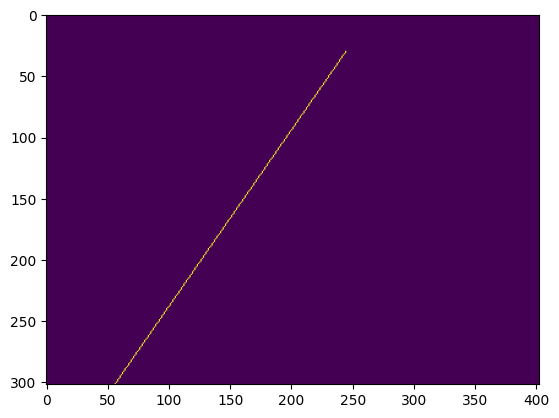

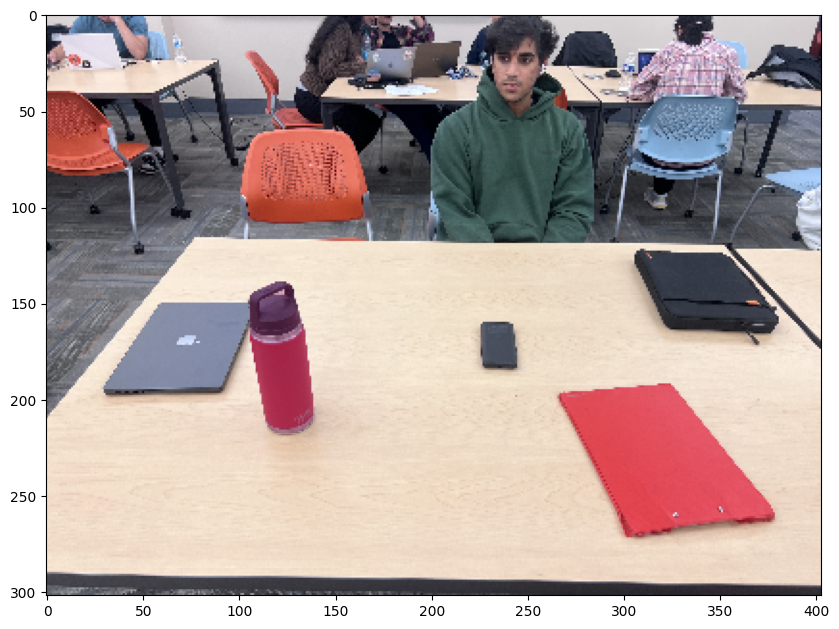

In [3]:



for file in os.listdir("./data"):
    if file.endswith(".jpeg") or file.endswith(".png"):
        if file != "IMG_7763.jpeg":
            continue
        image_path = os.path.join("./data", file)   
        img, small = img_module.load_img(image_path)
        img_module.set_img(small)
        
        # gaze estimation

        arrow_start, arrow_end = model2_module.find_vector_arrow(img)
        
        #segmentation
        masks = model_module.mask_generate(small)
        masks_on_table = mask_module.find_object_on_table(masks)
        if len(masks_on_table) == 0:
            print("No object on table")
            continue
        mask_line = img_module.get_mask_line(arrow_start, arrow_end)
        plt.imshow(mask_line)
        for mask in masks_on_table:
            seg = mask["segmentation"]
            if np.sum(seg & mask_line) > 0:
                img_module.show_anns([mask], True, file)
                # img_module.show_box(mask["bbox"])
                break
        
        
        

